In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
#defining training and test sets

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dir = "lab4/animals"

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             validation_split=0.2,
                                             seed=123,
                                             subset="training",
                                             batch_size=BATCH_SIZE,
                                             label_mode='categorical',
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             validation_split=0.2,
                                             seed=123,
                                             subset="validation",
                                             label_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 1999 files belonging to 4 classes.
Using 1600 files for training.
Found 1999 files belonging to 4 classes.
Using 399 files for validation.


In [3]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [4]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SHAPE = IMG_SIZE + (3,)
base_model=tf.keras.applications.VGG19(input_shape=IMG_SHAPE,weights='imagenet',include_top=False)

In [5]:
base_model.trainable = False

In [6]:
x=base_model.output
# x=data_augmentation(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
xd=tf.keras.layers.Dense(512,activation='relu')(x)
preds=tf.keras.layers.Dense(4,activation='softmax')(xd)

In [7]:
model=tf.keras.models.Model(inputs=base_model.input,outputs=preds)

In [8]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
50/50 [==============================] - 91s 2s/step - loss: 3.3765 - accuracy: 0.6917 - val_loss: 0.2770 - val_accuracy: 0.9023
Epoch 2/10
50/50 [==============================] - 101s 2s/step - loss: 0.1551 - accuracy: 0.9576 - val_loss: 0.2444 - val_accuracy: 0.9223
Epoch 3/10
50/50 [==============================] - 105s 2s/step - loss: 0.0839 - accuracy: 0.9808 - val_loss: 0.2428 - val_accuracy: 0.9273
Epoch 4/10
50/50 [==============================] - 104s 2s/step - loss: 0.0527 - accuracy: 0.9944 - val_loss: 0.2441 - val_accuracy: 0.9123
Epoch 5/10
50/50 [==============================] - 98s 2s/step - loss: 0.0333 - accuracy: 0.9980 - val_loss: 0.2518 - val_accuracy: 0.9248
Epoch 6/10
50/50 [==============================] - 107s 2s/step - loss: 0.0285 - accuracy: 0.9980 - val_loss: 0.2571 - val_accuracy: 0.9223
Epoch 7/10
50/50 [==============================] - 104s 2s/step - loss: 0.0269 - accuracy: 0.9969 - val_loss: 0.2605 - val_accuracy: 0.9173
Epoch 8/10
50/5

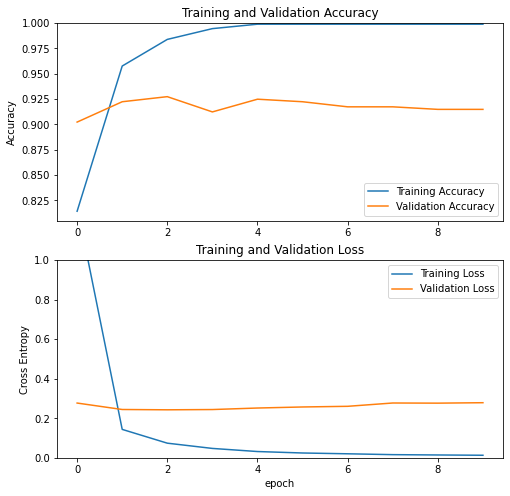

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
class_names = ["duck", "giraffe", "lion"]

plt.figure(figsize=(20, 20))
idx = 0
for j in range(10):
  for images, labels in validation_dataset.take(j):
    if (idx > 15):
      break;
    labels = np.argmax(labels, axis =-1)
    print(labels)
    y_pred = np.argmax(model.predict(images), axis=-1)
    print(y_pred)
    for i in range(len(labels)):
      if y_pred[i] != labels[i]:
        ax = plt.subplot(4, 4, idx + 1)
        idx += 1
        if (idx > 15):
          break;
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[y_pred[i]])
        plt.axis("off")

In [10]:
p = [0,0,0,0]

for j in range(10):
  for images, labels in validation_dataset.take(j):
    labels = np.argmax(labels, axis =-1)
    print(labels)
    y_pred = np.argmax(model.predict(images), axis=-1)
    print(y_pred)
    for i in range(len(labels)):
      if y_pred[i] != labels[i]:
        p[y_pred[i]] += 1
        p[labels[i]] += 1

[3 3 0 0 3 3 3 0 0 0 2 0 0 0 0 2 0 0 0 0 2 1 3 0 1 0 1 1 3 0 3 0]
[3 3 0 0 3 3 3 0 0 0 2 0 0 0 0 2 0 0 0 0 2 1 3 0 1 0 1 1 3 0 2 0]
[0 0 1 3 3 3 3 1 1 2 1 2 0 1 1 1 3 2 1 0 2 2 1 0 3 1 2 1 2 0 1 2]
[0 0 1 3 3 3 3 1 1 2 1 2 0 1 1 1 3 2 1 0 2 2 1 0 3 1 2 1 2 0 2 2]
[2 1 1 0 2 1 1 2 3 0 2 2 0 3 0 0 1 3 1 1 0 2 3 2 1 1 1 1 0 0 2 1]
[3 1 1 0 2 2 1 2 3 0 2 1 0 3 0 0 1 3 1 1 0 2 2 2 1 1 1 1 0 0 2 1]
[3 3 1 0 1 0 3 1 1 1 0 0 2 0 3 2 3 0 2 0 0 2 2 1 2 0 0 2 0 1 0 1]
[3 3 2 0 1 0 3 3 1 1 0 0 2 0 3 2 3 0 2 0 0 2 1 1 2 0 0 2 0 1 0 1]
[1 1 3 2 0 1 1 1 3 2 1 1 1 0 1 1 3 0 2 2 2 2 0 0 1 1 3 0 3 1 1 2]
[1 2 3 2 0 1 1 1 3 2 1 1 1 0 1 1 3 0 2 2 3 1 0 0 1 1 3 0 3 1 1 2]
[0 1 3 0 0 2 2 3 0 1 2 2 2 3 3 0 0 1 0 1 1 2 1 0 2 0 2 1 2 1 0 1]
[0 1 3 0 0 3 3 3 0 1 2 2 2 3 3 0 0 1 0 1 1 2 1 0 2 0 3 1 2 1 0 1]
[0 0 3 0 1 1 1 1 1 0 1 0 3 3 1 3 0 0 3 1 2 1 1 1 3 3 2 0 2 1 3 3]
[0 0 1 0 1 1 1 1 1 0 1 0 3 3 1 3 0 0 3 1 2 1 1 3 3 3 2 0 2 1 2 3]
[0 2 2 1 3 3 0 0 1 0 2 3 0 0 2 3 1 1 2 2 2 3 1 2 3 2 1 2 1 1 2 0]
[0 2 2 1 3

In [11]:
p

[2, 72, 97, 75]